# Нейронная сеть Хопфилда

## Теория

Нейронная сеть Хопфилда — полносвязная нейронная сеть с симметричной матрицей связей. Такая сеть может быть использована для организации ассоциативной памяти, как фильтр, а также для решения некоторых задач оптимизации.

Сеть Хопфилда является абсолютно однородной структурой без какой-либо внутренней специализации ее нейронов. Её классический вариант состоит из единственного слоя нейронов, число которых является одновременно числом входов и выходов сети. Каждый нейрон сети связан со всеми остальными нейронами, а также имеет один вход, через который осуществляется ввод сигнала.

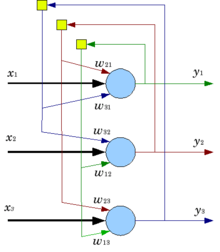

Нейронная сеть Хопфилда устроена так, что её отклик на запомненные $m$ эталонных «образов» составляют сами эти образы, а если образ немного исказить и подать на вход, он будет восстановлен и в виде отклика будет получен оригинальный образ. Таким образом, сеть Хопфилда осуществляет коррекцию ошибок и помех.

### Обучение

В процессе обучения формируется выходная матрица $W$, которая запоминает $m$ эталонных «образов» — $N$-мерных бинарных векторов, эти образы во время эксплуатации сети будут выражать отклик системы на входные сигналы, или иначе - окончательные значения выходов $y_i$ после серии итераций.

В сети Хопфилда матрица связей является симметричной ($w_{ij}=w_{ji}$), а диагональные элементы матрицы полагаются равными нулю ($w_{ij}=0$), что исключает эффект воздействия нейрона на самого себя и является необходимым для сети Хопфилда, но не достаточным условием устойчивости в процессе работы сети.

Обучение сети заключается в том, что находятся веса матрицы взаимодействий так, чтобы запомнить $m$ векторов (эталонных образов, составляющих "память" системы).
Запоминаемые векторы должны иметь бинарный вид. Расчёт весовых коэффициентов проводится по следующей формуле:
\begin{align}
w_{ij} = \frac{1}{N}\sum_{d=1..m} X_{id} X_{jd}.
\end{align}
где $N$ — размерность векторов, $m$ — число запоминаемых выходных векторов, $d$ — номер запоминаемого выходного вектора, $X_{{ij}}$ — $i$-я компонента запоминаемого выходного $j$-го вектора.

Расчёт этих весовых коэффициентов и называется обучением сети, которое проводится только за одну эпоху.

### Востановление образов

Как только веса заданы, сеть может быть использована для получения запомненного выходного вектора по данному входному вектору, который может быть частично неправильным или неполным. Для этого выходам сети сначала придают значения этого начального вектора. Затем сеть последовательно меняет свои состояния согласно формуле:
$X(t+1)=F(WX(t))$
где F — активационная функция,
$X(t)$ и $X(t+1)$ — текущее и следующее состояния сети, до тех пор, пока состояния $X(t)$ и $X(t+1)$ не совпадут. Полученное устойчивое состояние
$X_{i}$ (статический аттрактор), или, возможно, в синхронном случае пара
$X_{i},X_{i+1}$ (динамический аттрактор), является ответом сети на данный входной образ.



> На выходе сети может получаться также инверсный вектор (в котором значения -1 и 1 в запомненных образцах перевёрнуты). В случае, если система не нашла решения, на выходе системы могут получаться также тривиальные вектора, состоящие только из 1 или только из -1.



Это же можно описать так называемым локальным полем $a_{{i}}$ действующим на нейрон $x_{i}$ со стороны всех остальных нейронов сети:
\begin{align}
a_i(t)=\sum_{j=1, j\neq i}^N w_{ij}x_j(t-1)
\end{align}

После расчёта локального поля нейрона
$a_{i}(t)$ это значение используется для расчёта значения выхода через функцию активации, которая в данном случае является пороговой (с нулевым порогом). Соответственно, значение выхода нейрона і в текущий момент времени
$x_{i}(t)$ рассчитывается по формуле:
\begin{align}
x_i(t)=sign(\sum_{j=1, j\neq i}^N w_{ij}x_j(t-1))
\end{align}
где $w_{ij}$ — весовой коэффициент между нейронами $i$ и $j$,
$x_{j}(t-1)$ — значения выходов нейрона $j$ в предыдущий момент времени.

## Создадим класс нейронной сети

In [1]:
import numpy as np


class Hopfield:  # класс нейронной сети

    def __init__(self, n, k):  # инициализация
        self.N = n  # количество нейронов
        self.K = k  # максимальное количсетво эпох распознавания сигнала
        self.W = np.zeros((n, n))  # матрица взаимодействий (весов)

    def remember(self, M):  # метод запоминания образов
        for X in M:  # перебор массива образов
            for i in range(self.N):
                for j in range(self.N):
                    if i == j:
                        self.W[i][j] = 0  # диагональные элементы матрицы полагаются равными нулю
                    else:
                        self.W[i][j] += X[i] * X[j]  # можно опустить деление на N

    def associations(self, signal):  # распознавание образа
        X = signal.copy()  # текущее состояние
        stop = 0

        while (stop < self.K):
            pre_X = X.copy()  # предыдущее состояние
            for i in range(self.N):
                a_i = 0
                for j in range(self.N):
                    a_i += self.W[i][j] * pre_X[j]
                X[i] = self.signum(a_i)

            if (pre_X == X).all():  # выход из цикла, если значения стабилизировались
                return X
            stop += 1
        return X

    def signum(self, a):  # функция активации
        return 1 if a >= 0 else -1

Частый пример работы нейронной сети Хопфилда - это распознавание образов букв.

### Вспомогательные функции

In [3]:
def create_image(base, dic):  # Создает бинарный вектор образа
    a = np.array([])
    for i in base:
        a = np.append(a, dic[i])
    return a


def parse_image(img, dic, n):  # Выводит образ по бинарному вектору
    a = ''
    for i in range(len(img)):
        if i % n == 0:
            print(a)
            a = ''
        a += dic[img[i]]


def print_images(img1, img2, dic, n):
    a1 = ''
    a2 = ''
    for i in range(len(img1)):
        if i % n == 0:
            print(a1, ' ' * 10, a2)
            a1 = ''
            a2 = ''
        a1 += dic[img1[i]]
        a2 += dic[img2[i]]
    print('>' * 32)

### Образы

In [4]:
symbols = {"#": 1,
           "_": -1}
symbols_reverse = {1: '#',
                   -1: '_'}

t = "##########" \
    "##########" \
    "____##____" \
    "____##____" \
    "____##____" \
    "____##____" \
    "____##____" \
    "____##____" \
    "____##____" \
    "____##____"

n = "##______##" \
    "##______##" \
    "##______##" \
    "##______##" \
    "##########" \
    "##########" \
    "##______##" \
    "##______##" \
    "##______##" \
    "##______##"

k = "##______##" \
    "##_____##_" \
    "##____##__" \
    "##__##____" \
    "####______" \
    "####______" \
    "##__##____" \
    "##____##__" \
    "##_____##_" \
    "##______##"

images = np.array([create_image(t, symbols),
                   create_image(n, symbols),
                   create_image(k, symbols)])

### Сигналы

In [5]:
t1 = "#######_##" \
     "##_#######" \
     "____##____" \
     "____##____" \
     "____##____" \
     "___###____" \
     "____##____" \
     "____##__#_" \
     "____##____" \
     "____##____"

n1 = "##______##" \
     "###_____##" \
     "###______#" \
     "##______##" \
     "####_#####" \
     "#######_##" \
     "#___#___##" \
     "##_#___###" \
     "##______##" \
     "##______##"

k1 = "##______##" \
     "###____##_" \
     "##____####" \
     "##__###___" \
     "####___#__" \
     "#_##____#_" \
     "##__##____" \
     "##________" \
     "###____##_" \
     "##______##"

pa = "__________" \
     "_______#__" \
     "_#________" \
     "__________" \
     "____#_____" \
     "__________" \
     "__________" \
     "_______#__" \
     "__________" \
     "__#_______"

signals = np.array([create_image(t1, symbols),
                    create_image(n1, symbols),
                    create_image(k1, symbols),
                    create_image(pa, symbols)])

### Тесты

In [6]:
NEURONS_NUMBER = len(t)  # 100 # количество нейронов
MAX_STEPS = 100  # максимальное кол-во итераций

h = Hopfield(NEURONS_NUMBER, MAX_STEPS)
h.remember(images)

answer = ''
for signal in signals:
    res = h.associations(signal)
    print_images(signal, res, symbols_reverse, 10)

            
#######_##            ##########
##_#######            ##########
____##____            ____##____
____##____            ____##____
____##____            ____##____
___###____            ____##____
____##____            ____##____
____##__#_            ____##____
____##____            ____##____
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            
##______##            ##______##
###_____##            ##______##
###______#            ##______##
##______##            ##______##
####_#####            ##########
#######_##            ##########
#___#___##            ##______##
##_#___###            ##______##
##______##            ##______##
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            
##______##            ##______##
###____##_            ##_____##_
##____####            ##____##__
##__###___            ##__##____
####___#__            ####______
#_##____#_            ####______
##__##____            ##__##____
##________            ##____##__
###____##_            ##_____##_
>>>>

## Работа с фильмами

Нейронную сеть Хопфилда можно использовать для задачи группировки/фильтрации фильмов.

### Вспомогательные функции для работы с данными

In [7]:
import enum


class DateEnum(enum.Enum):  # перечисление промежутков дат
    D1800 = '1800-e'
    D1900 = '1900-e'
    D1910 = '1910-e'
    D1920 = '1920-e'
    D1930 = '1930-e'
    D1940 = '1940-e'
    D1950 = '1950-e'
    D1960 = '1960-e'
    D1970 = '1970-e'
    D1980 = '1980-e'
    D1990 = '1990-e'
    D2000 = '2000-e'
    D2010 = '2010-e'
    D2015 = '2015-e'
    D2020 = '2020-e'


class Runtime(enum.Enum):  # перечисление промежутков длительности фильмов
    KOR = 'Короткий метр'
    NORM = 'Стандартный метр'
    DLIN = 'Длинный метр'


class Budget(enum.Enum):  # перечисление промежутков бюджетов фильмов
    MAL = 'Малобюджетный'
    NORM = 'Средний'
    KRUP = 'Крупнобюджетный'


class Average(enum.Enum):  # перечисление промежутков оценок фильмов
    BAD = 0
    NORM = 1
    GOOD = 2

In [13]:
import datetime


def replace_date(d):
    release_date = datetime.datetime.strptime(d, '%Y-%m-%d').date()
    if 1900 <= release_date.year < 1910:
        return DateEnum.D1900
    elif 1910 <= release_date.year < 1920:
        return DateEnum.D1910
    elif 1920 <= release_date.year < 1930:
        return DateEnum.D1920
    elif 1930 <= release_date.year < 1940:
        return DateEnum.D1930
    elif 1940 <= release_date.year < 1950:
        return DateEnum.D1940
    elif 1950 <= release_date.year < 1960:
        return DateEnum.D1950
    elif 1960 <= release_date.year < 1970:
        return DateEnum.D1960
    elif 1970 <= release_date.year < 1980:
        return DateEnum.D1970
    elif 1980 <= release_date.year < 1990:
        return DateEnum.D1980
    elif 1990 <= release_date.year < 2000:
        return DateEnum.D1990
    elif 2000 <= release_date.year < 2010:
        return DateEnum.D2000
    elif 2010 <= release_date.year < 2015:
        return DateEnum.D2010
    elif 2015 <= release_date.year < 2020:
        return DateEnum.D2015
    elif 2020 <= release_date.year:
        return DateEnum.D2020
    else:
        return DateEnum.D1800


def replace_runtime(runtime):
    if runtime < 60:
        return Runtime.KOR
    elif 60 <= runtime < 130:
        return Runtime.NORM
    else:
        return Runtime.DLIN


def replace_budget(budget):
    if 0 < budget < 5000000:
        return Budget.MAL
    elif 5000000 <= budget <= 50000000:
        return Budget.NORM
    else:
        return Budget.KRUP


def replace_avarege(vote_average):
    if 0 < vote_average <= 4.5:
        return Average.BAD
    elif 4.5 < vote_average <= 6.7:
        return Average.NORM
    else:
        return Average.GOOD

In [9]:
def replace_list(s):
    if type(s) == str:
        return (s.split('-'))
    else:
        return s

### Подготовка данных

In [14]:
import pandas as pd
import numpy as np


df = pd.read_csv("Datasets/movies.csv", engine="python")  # чтение данных
df = df.loc[(df['status'] == 'Released') &
            (df['runtime'] > 0) &
            (df['vote_average'] > 0) &
            (df['budget'] > 0)]  # фильтрация записей
df = df.sample(frac=.02, random_state=2)  # выборка 1% случайных записей
df = df[['title', 'genres', 'release_date', 'budget', 'runtime', 'vote_average']]  # выборка нужных колонок
df = df.dropna()  # избавление от неполных записей

df['release_date'] = df['release_date'].apply(replace_date)  # замена дат выхода
df['runtime'] = df['runtime'].apply(replace_runtime)  # замена продолжительности
df['budget'] = df['budget'].apply(replace_budget)  # замена бюджета
df['vote_average'] = df['vote_average'].apply(replace_avarege)  # замена средней оценки
df = df.reset_index(drop=True)  # сброс индексов
df

,title,genres,release_date,budget,runtime,vote_average
0,Jurassic World Dominion,Adventure-Action-Science Fiction,DateEnum.D2020,Budget.KRUP,Runtime.DLIN,Average.GOOD
1,The Love Epidemic,Comedy-Documentary,DateEnum.D1970,Budget.MAL,Runtime.NORM,Average.NORM
2,The Windy City Incident,Comedy,DateEnum.D2000,Budget.MAL,Runtime.NORM,Average.BAD
3,Monsters,Drama-Thriller-Science Fiction,DateEnum.D2010,Budget.MAL,Runtime.NORM,Average.NORM
4,Funny Farm,Comedy,DateEnum.D1980,Budget.NORM,Runtime.NORM,Average.NORM
...,...,...,...,...,...,...
434,The Journey of Jared Price,Drama-Romance,DateEnum.D2000,Budget.MAL,Runtime.NORM,Average.NORM
435,Chernobyl: Abyss,Drama-History-Adventure-Action-Fantasy-Mystery,DateEnum.D2020,Budget.NORM,Runtime.DLIN,Average.NORM
436,Gemma Bovery,Romance-Drama-Comedy,DateEnum.D2010,Budget.NORM,Runtime.NORM,Average.NORM
437,Aagathan,Mystery-Romance,DateEnum.D2010,Budget.MAL,Runtime.NORM,Average.NORM


В получившемся массиве данных ищутся все уникальные значения в каждой колонке (кроме названия фильма). Каждый фильм может быть охарактеризован бинарным вектором состоящим из значений 1 и -1 для каждой уникальной характеристики.

In [15]:
columns = []
for column in df.columns[1:]:
    columns += list(df[column].apply(replace_list).explode().reset_index(
        drop=True).unique())  # нахождение всех уникальных значений для выбранных фильмов
data = pd.DataFrame([[-1] * len(columns)] * df.axes[0].stop,
                    columns=columns)  # основа для конвертированного массива данных фильмов

In [16]:
for i, row in df.iterrows():

    genres = replace_list(row['genres'])
    for g in genres:
        data.loc[[i], [g]] = 1

    data.loc[[i], [row['release_date']]] = 1

    data.loc[[i], [row['budget']]] = 1

    data.loc[[i], [row['runtime']]] = 1

    data.loc[[i], [row['vote_average']]] = 1

data

,Adventure,Action,Science Fiction,Comedy,Documentary,Drama,Thriller,Romance,Animation,Horror,...,DateEnum.D1910,Budget.KRUP,Budget.MAL,Budget.NORM,Runtime.DLIN,Runtime.NORM,Runtime.KOR,Average.GOOD,Average.NORM,Average.BAD
0,1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,1,-1,-1,1,-1,-1
1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,-1,1,-1,-1,1,-1
2,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,-1,1,-1,-1,-1,1
3,-1,-1,1,-1,-1,1,1,-1,-1,-1,...,-1,-1,1,-1,-1,1,-1,-1,1,-1
4,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,1,-1,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,-1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,-1,1,-1,-1,1,-1,-1,1,-1
435,1,1,-1,-1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,1,1,-1,-1,-1,1,-1
436,-1,-1,-1,1,-1,1,-1,1,-1,-1,...,-1,-1,-1,1,-1,1,-1,-1,1,-1
437,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,1,-1,-1,1,-1


### Работа с нейросетью

In [17]:
def convert_image(user_image, columns):  # функция преобразования образа в вектор бинарных значений
    conv_image = pd.DataFrame([[-1] * len(columns)], columns=columns)
    for row in user_image.itertuples(index=False):
        for i in range(len(row)):
            for v in row[i]:
                conv_image.loc[[0], [v]] = 1
    return conv_image.astype(object).to_numpy()[0]

#### Образы

В полученном после конвертации массиве фильмов (где каждый фильм описывается бинарным вектором) находится всего 40 колонок, то есть в нейросети будет использовано всего 40 нейронов. Соответственно для правильной и стабильной работы нейросети количество запоминаемых ей образов ограничено 3-4 штуками.

In [18]:
columns_image = ['genres', 'release_date', 'budget', 'vote_average', 'runtime']

with_friends = [['Horror', 'Comedy', 'Action', 'Mystery', 'Crime', 'Thriller'],
                [DateEnum.D2020, DateEnum.D2015, DateEnum.D2010, DateEnum.D2000, DateEnum.D1990],
                [Budget.MAL, Budget.NORM, Budget.KRUP],
                [Average.BAD, Average.NORM],
                [Runtime.NORM]]
with_girl = [['Family', 'Romance', 'Animation', 'TV Movie', 'Music', 'Fantasy'],
             [DateEnum.D2020, DateEnum.D2015, DateEnum.D2010],
             [Budget.NORM, Budget.KRUP],
             [Average.GOOD],
             [Runtime.KOR, Runtime.NORM]]
with_family = [['Family', 'Mystery', 'Comedy', 'TV Movie'],
               [DateEnum.D2000, DateEnum.D1990, DateEnum.D1980, DateEnum.D1970, DateEnum.D1960, DateEnum.D1950],
               [Budget.NORM, Budget.KRUP],
               [Average.GOOD, Average.NORM],
               [Runtime.NORM, Runtime.DLIN]]

with_friends_img = pd.DataFrame([with_friends], columns=columns_image)
with_girl_img = pd.DataFrame([with_girl], columns=columns_image)
with_family_img = pd.DataFrame([with_family], columns=columns_image)

images = np.array([convert_image(with_friends_img, columns),
                   convert_image(with_girl_img, columns),
                   convert_image(with_family_img, columns)], dtype=object)

names = np.array(['С друзьями', 'С девушкой', 'С семьей'])

#### Запуск

In [19]:
NEURONS_NUMBER = len(columns)  # 100 # количество нейронов
MAX_STEPS = 100  # максимальное кол-во итераций
h = Hopfield(NEURONS_NUMBER, MAX_STEPS)

h.remember(images)
groups = []
for signal in data.values.tolist():
    res = h.associations(np.array(signal))
    if (res == images).all(axis=1).any():
        name = names[np.where(np.all(images == res, axis=1))[0][0]]
        groups.append(name)
    else:
        groups.append('Не подходит')

df['group'] = groups
print(df.groupby(['group']).size())
df.loc[(df['group'] != 'Не подходит')].sort_values(['group']).reset_index(drop=True)

group
Не подходит    192
С девушкой      92
С друзьями     139
С семьей        16
dtype: int64


,title,genres,release_date,budget,runtime,vote_average,group
0,Jurassic World Dominion,Adventure-Action-Science Fiction,DateEnum.D2020,Budget.KRUP,Runtime.DLIN,Average.GOOD,С девушкой
1,Lonesome Desert Cactus,Comedy-Drama,DateEnum.D2015,Budget.MAL,Runtime.KOR,Average.GOOD,С девушкой
2,Naschy of the Full Moon,Documentary-Horror,DateEnum.D2010,Budget.MAL,Runtime.KOR,Average.GOOD,С девушкой
3,Complex Bereavement,Drama-Horror-Mystery,DateEnum.D2020,Budget.MAL,Runtime.KOR,Average.GOOD,С девушкой
4,Adam Patel: Real Magic,Documentary,DateEnum.D2015,Budget.MAL,Runtime.KOR,Average.GOOD,С девушкой
...,...,...,...,...,...,...,...
242,Journey to the Center of the Earth,Adventure-Fantasy-Family,DateEnum.D1950,Budget.MAL,Runtime.DLIN,Average.GOOD,С семьей
243,Tempest,Comedy-Drama-Romance,DateEnum.D1980,Budget.NORM,Runtime.DLIN,Average.NORM,С семьей
244,Aliens,Action-Thriller-Science Fiction,DateEnum.D1980,Budget.NORM,Runtime.DLIN,Average.GOOD,С семьей
245,Great Times,Family-War-Drama,DateEnum.D1970,Budget.MAL,Runtime.NORM,Average.NORM,С семьей


Нейронная сеть Хопфилда эффективна для задачи восстановления образа, однако конкретно для задачи разделения фильмов на группы по образам проще и эффективнее использовать классические фильтры данных.